In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("customer.csv")

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.shape

(440, 8)

In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
df.drop(["Channel","Region"],axis=1,inplace=True)

In [7]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [8]:
df.loc[[100,200,300],:]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
100,11594,7779,12144,3252,8035,3029
200,3067,13240,23127,3941,9959,731
300,16448,6243,6360,824,2662,2005


In [9]:
df.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [10]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [11]:
fresh_q1 = 3127.750000
display(df.loc[df.Fresh < fresh_q1,: ].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
16,1020,8816,12121,134,4508,1080
31,2612,4339,3133,2088,820,985
34,1502,1979,2262,425,483,395
35,688,5491,11091,833,4239,436
43,630,11095,23998,787,9529,72


In [12]:
frozen_q1 = 742.250000
display(df.loc[df.Frozen < frozen_q1,:].head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
8,5963,3648,6192,425,1716,750
12,31714,12319,11757,287,3881,2931


In [13]:
frozen_q3 = 3554.250000
display(df.loc[df.Frozen > frozen_q3,:].head(7))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
10,3366,5403,12974,4400,5977,1744
22,31276,1917,4469,9408,2381,4334
23,26373,36423,22019,5154,4337,16523
33,29729,4786,7326,6130,361,1083
39,56159,555,902,10002,212,2916


In [14]:
indices = [43,12,39]

samples=pd.DataFrame(df.loc[indices,:],columns=df.columns).reset_index(drop = True)

In [15]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,630,11095,23998,787,9529,72
1,31714,12319,11757,287,3881,2931
2,56159,555,902,10002,212,2916


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
mean_data=df.describe().loc["mean",:]
mean_data

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
Name: mean, dtype: float64

In [18]:
samples_bar=samples.append(mean_data)
samples_bar


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,630.000000,11095.000000,23998.000000,787.000000,9529.000000,72.000000
1,31714.000000,12319.000000,11757.000000,287.000000,3881.000000,2931.000000
2,56159.000000,555.000000,902.000000,10002.000000,212.000000,2916.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455


In [19]:
samples_bar.index=indices + ['mean']
samples_bar.index

Index([43, 12, 39, 'mean'], dtype='object')

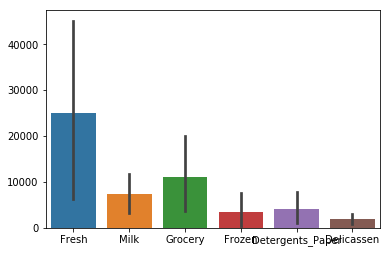

In [20]:
sns.barplot(data=samples_bar)

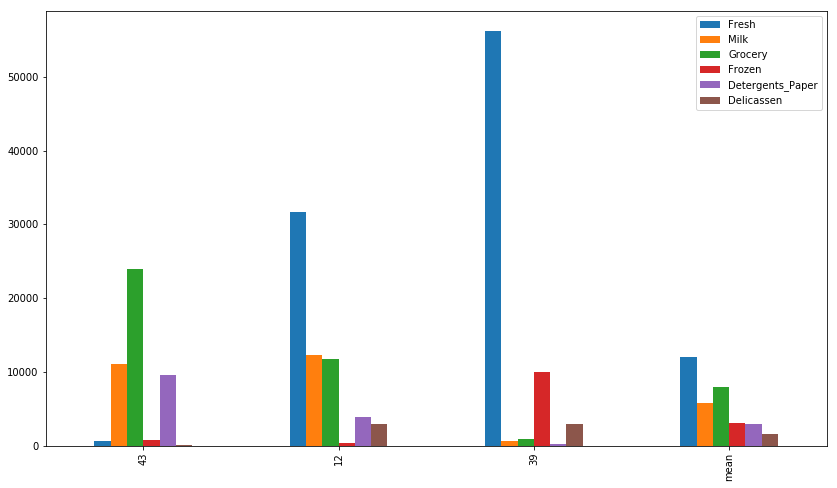

In [21]:
samples_bar.plot(kind='bar', figsize=(14,8))

In [22]:
percentiles = df.rank(pct=True)
percentiles = 100*percentiles.round(decimals=3)
percentiles = percentiles.iloc[indices]

In [23]:
percentiles

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
43,8.0,88.0,95.0,26.8,93.4,5.9
12,93.6,90.2,79.1,10.7,74.5,89.8
39,99.3,4.1,5.7,95.2,19.7,89.5


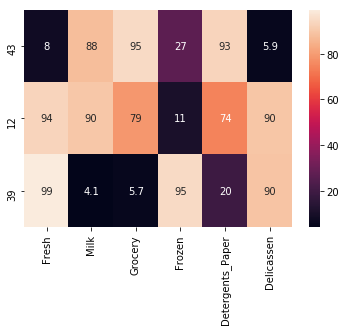

In [24]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeRegressor
sns.heatmap(percentiles,annot=True)


In [25]:
data=df.copy()

In [26]:
dep_vars = list(data.columns)

In [27]:
dep_vars = list(data.columns)
for var in dep_vars:
    new_data = data.drop([var],axis=1)
    new_feature = pd.DataFrame(data.loc[:,var])
    x_train,x_test,y_train,y_test=train_test_split(new_data,new_feature,test_size=0.25,random_state=42)
    dtr=DecisionTreeRegressor(random_state=42)
    dtr.fit(x_train,y_train)
    score=dtr.score(x_test,y_test)
    print("R2 Score for {} as dependent variable: {}".format(var,score))

R2 Score for Fresh as dependent variable: -0.38574971020407384
R2 Score for Milk as dependent variable: 0.15627539501732116
R2 Score for Grocery as dependent variable: 0.6818840085440834
R2 Score for Frozen as dependent variable: -0.21013589012491396
R2 Score for Detergents_Paper as dependent variable: 0.27166698062685013
R2 Score for Delicassen as dependent variable: -2.254711537203931


In [28]:

    dep_vars = list(data.columns)
for var in dep_vars:
    new_data = data.drop([var],axis=1)
    new_feature = pd.DataFrame(data.loc[:,var])
    x_train,x_test,y_train,y_test=train_test_split(new_data,new_feature,test_size=0.25,random_state=42)
    dtr=DecisionTreeRegressor(random_state=42)
    dtr.fit(x_train,y_train)
    score=dtr.score(x_test,y_test)
    print("R2 Score for {} as dependent variable: {}".format(var,score))

IndentationError: unexpected indent (<ipython-input-28-f3da525d72bd>, line 2)

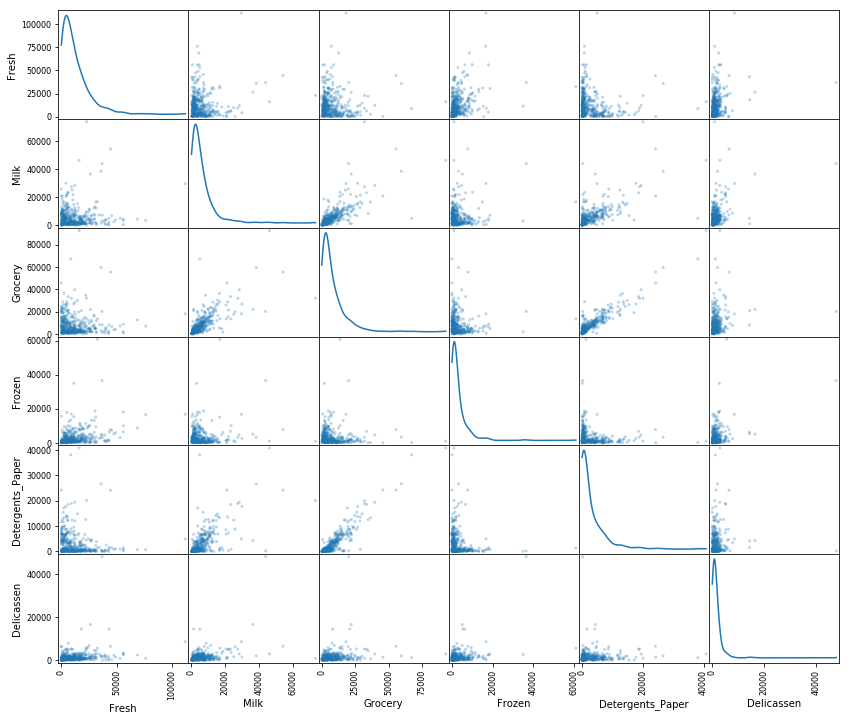

In [34]:
pd.plotting.scatter_matrix(df,alpha=0.3,figsize=(14,12), diagonal= 'kde')
plt.show()

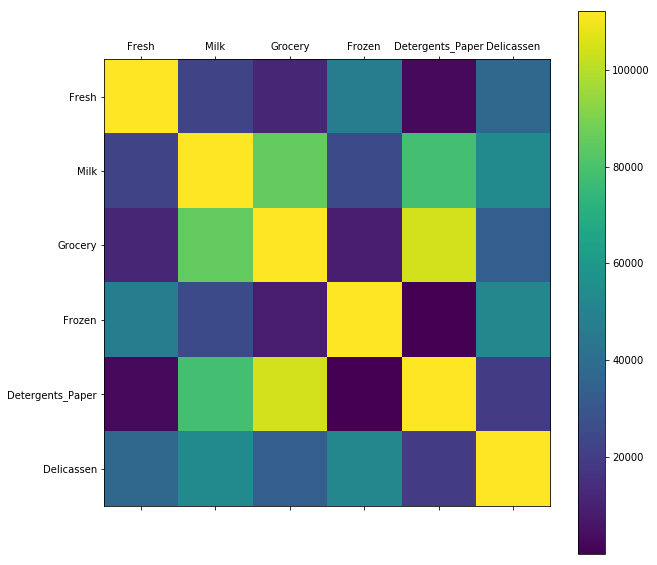

In [50]:
def plot_corr(x,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = x.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(x, interpolation='nearest')
    ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    #print(corr.columns)
    #print(len(corr.columns))
    #print(corr)


plot_corr(data)

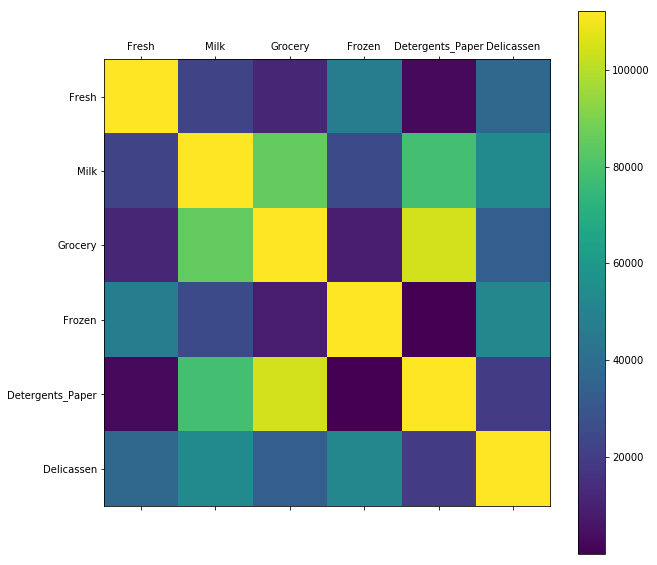

In [54]:
def plot_corr(x,size=10):
    corr=x.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    cax = ax.matshow(x,interpolation='nearest')
    ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)

plot_corr(df)

In [56]:
log_data=np.log(df)
log_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


In [57]:
log_samples=np.log(samples)
log_samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,6.445720,9.314250,10.085726,6.668228,9.162095,4.276666
1,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099
2,10.935942,6.318968,6.804615,9.210540,5.356586,7.977968


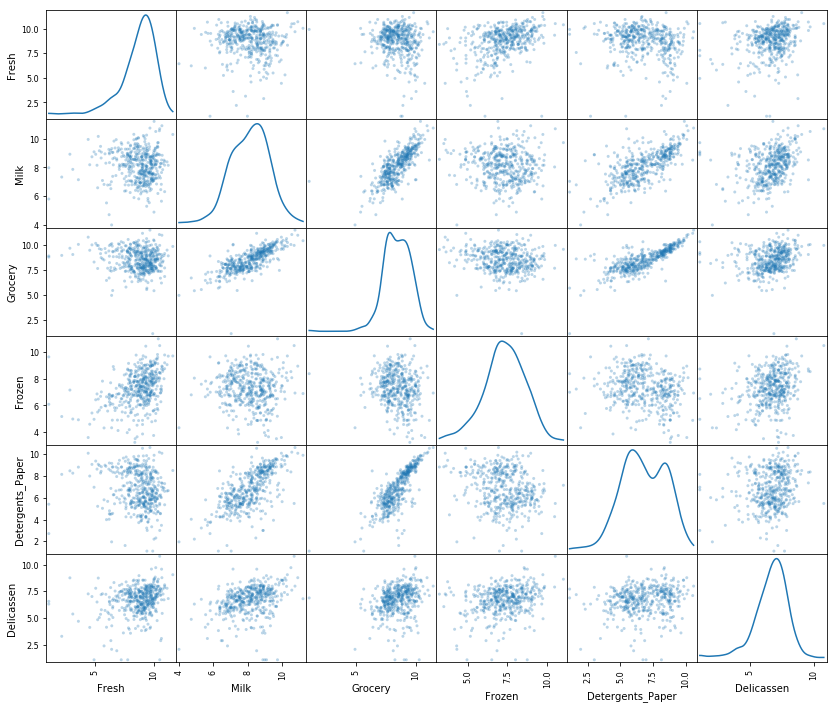

In [60]:
pd.plotting.scatter_matrix(log_data,alpha = 0.3, figsize=(14,12), diagonal = "kde")
plt.show()